# @AUTHOR: DIEGO SANZ VILLAFRUELA  <font color="red">NOTA:10


## Algoritmia
### Práctica 7
En esta práctica se realizarán funciones para representar montículos. Las soluciones se pueden plantear mediante divide y vencerás.

# Se pide la implementación de las clases y/o funciones que aparecen a continuación.

Las instrucción "pass" que aparecen en el cuerpo de las clases o funciones, se debe sustituir por la implementación adecuada.

Para cada clase o función que se pide se proporciona una o más funciones con algunos tests.

Al llamar a las funciones de test no debería saltar ninguna aserción.

### Representación de montículos en cadenas <font color="red">OK
Dado un [montículo](https://youtu.be/qapnpHe8XPM?list=PLCsrYL37r9im86gYrlVPtYta8DLHGNMa0) se quiere una cadena de caracteres con una representación textual de dicho montículo.

Los montículos son [árboles completos](https://youtu.be/DwsR7lKdRUc?list=PLCsrYL37r9im86gYrlVPtYta8DLHGNMa0).

El montículo vendrá dado por una lista con los elementos, tal como se hace en el módulo [heapq](https://docs.python.org/3.5/library/heapq.html).

Por ejemplo, si hacemos

```print(representa_monticulo([3, 15, 68, 34, 39, 85, 85, 71, 47, 84]))```

se debería obtener:

```            
            3
      15       68
  34      39 85  85
71  47  84```

In [3]:
"""
    Dada una lista que contiene un montículo, devuelve una cadena con una
    representación del montículo.
    La cadena tendrá tantas líneas como niveles, la raíz estará en la primera
    línea, los hijos de la raíz en la segunda...
    La posición de un elemento dentro de su línea será la suma de las longitudes
    de las cadenas (obtenidas con la función str()) que representan todos los
    elementos a su izquierda en el montículo, de cualquier nivel.
"""
from math import log
    
def inorden(monticulo, offset,niv, nivelesList):
    
    if len(monticulo) == 1:
        elementoString = str(monticulo[0])
        nivelesList[niv].append( ( elementoString, offset) )
        return offset + len(elementoString)
    
    # separamos las particiones en arbol izquierdo, y derecho
    parteIzquierda = []; padre = str(monticulo[0]); parteDerecha = []
    
    numElementos = len(monticulo)
    indiceN = 1; i = 0; potencia = 1
    
    # divide y venceras en arbol izquierdo y derecho
    for nivel in range (1, int(log(numElementos,2))+1 ):
        i = 0
        while indiceN < numElementos and i < potencia :
            parteIzquierda.append(monticulo[indiceN])
            indiceN += 1; i+=1
        
        i = 0
        while indiceN < numElementos and i < potencia:
            parteDerecha.append(monticulo[indiceN])
            indiceN += 1; i+=1
        potencia *= 2;
    
    # arbol izquierdo
    longitudA = inorden( parteIzquierda, offset, niv + 1, nivelesList)
    
    # padre
    nivelesList[niv].append( ( padre, longitudA ) )
    
    # arbol derecho
    longitudB = longitudA + len(padre)
    if len(parteDerecha) > 0:
        longitudB = inorden( parteDerecha, longitudB, niv +1, nivelesList)
    return longitudB

def representa_monticulo(monticulo):
    nivelesList = []
    numNiveles = int( log ( len(monticulo),2))+1
    # creamos los niveles donde guardar los nodos y distancias
    for nivel in range (0, numNiveles ):
        nivelesList.append([])
    
    # obtenemos los niveles del arbol con los nodos y su longitud
    inorden( monticulo, 0, 0, nivelesList)

    # pintamos los nodos obtenidos anteriormente, con las separacion obtenida
    monticuloDibujo = "";
    indice = 0
    for indiceNivel in range(0,numNiveles):
        numEspacios = 0
        resta = 0
        # pintamos el nodo en el nivel con los espacios adecuados
        for nodo in nivelesList[ indiceNivel ]:
            numEspacios = nodo[1]-resta
            resta += numEspacios+len(nodo[0])
            monticuloDibujo += ' ' * numEspacios
            monticuloDibujo += nodo[0]
        # evitamos pintar el ultimo salto de linea
        if indiceNivel < numNiveles -1: 
            monticuloDibujo += '\n'
    
    return monticuloDibujo

# ejemplo de que funciona correctamnete
print(representa_monticulo(range (50)))


                                                        0
                           1                                                2
             3                           4                           5             6
      7             8             9             10             11       12     13     14
  15     16     17     18     19     20     21      22     23      24 25  26 27  28 29  30
31  32 33  34 35  36 37  38 39  40 41  42 43  44  45  46 47  48  49


#### Casos de prueba para `representa_monticulo`

In [4]:
def representaciones_parecidas(r1, r2):
    """
    Dadas dos cadenas con dos representaciones de un montículo comprueba si 
    son "parecidas": contienen las mismas líneas con los mismos elementos, con 
    independencia del número de espacios.
    """
    
    r1 = r1.replace('\n', ' * ')
    r2 = r2.replace('\n', ' * ')
    return ' '.join(r1.split()) == ' '.join(r2.split())

In [5]:
def test_representa_monticulo(relajado = True, imprime = True):
    """
    Tests para la función representa_monticulo.
    Si "relajado" es False, las cadenas deben ser idénticas. Si no, vale con que
    sean parecidas.
    Las representaciones se imprimen en función del valor de "imprime".
    """
    
    monticulos = ([3, 15, 68, 34, 39, 85, 85, 71, 47, 84],
                  [19, 86, 475, 353, 761, 500, 747, 397, 384, 944],
                  ['a', 'abbdd', 'bc', 'bace', 'bac', 'fce', 'e', 'eeae', 'ee', 
                   'ca'])
    
    representaciones = (
"""            3
      15       68
  34      39 85  85
71  47  84""",
"""                 19
         86           475
   353        761  500   747
397   384  944""", 
"""                    a
          abbdd         bc
    bace         bac fce  e
eeae    ee     ca""")
    
    for monticulo, representacion in zip(monticulos, representaciones):
        r = representa_monticulo(monticulo)
        if imprime:
            print(r, "\n")
        if relajado:
            assert representaciones_parecidas(r, representacion)
        else:
            assert r == representacion

In [6]:
if __name__ == "__main__": 
    test_representa_monticulo(relajado = True)
    print("OK")

            3
      15       68
  34      39 85  85
71  47  84 

                 19
         86           475
   353        761  500   747
397   384  944 

                    a
          abbdd         bc
    bace         bac fce  e
eeae    ee     ca 

OK


In [7]:
if __name__ == "__main__": 
    test_representa_monticulo(relajado = False, imprime = False)
    print("OK")

OK


### Representación gráfica del montículo  <font color="red">OK
Para la representación gráfica se plantea una función que asigne una posición a cada nodo del montículo

In [26]:
"""
    Dada una lista que contiene un montículo, devuelve una lista con las 
    posiciones de cada nodo.
    Las posiciones son tuplas con dos enteros. 
    El primero entero es la posición en el recorrido en inorden.
    El segundo es la profundidad del nodo, la raíz tiene profundidad 0, sus 
    hijos profundidad 1...
"""

from math import log

def inordenPosiciones(numElementos,numInorden, niv, profList):
    if numElementos == 1:
        profList[niv].append(numInorden)
        return numInorden + 1
    
    numElementos_Izquierda = 0; numElementos_Derecha = 0
    indiceN = 1; num = 1
    potencia = 1; i = 0
    
    # separamos el número de elementos entre los dos subarboles
    for nivel in range (1, int(log(numElementos,2))+1 ):
        i = 0
        while num < numElementos and  i < potencia :
            numElementos_Izquierda += 1
            num += 1; i += 1
        i = 0
        while num < numElementos and i < potencia:
            numElementos_Derecha += 1
            num += 1; i += 1
        
        potencia *= 2

    # hijo izquierdo
    numInorden = inordenPosiciones( numElementos_Izquierda,numInorden, niv + 1, profList)

    # padre
    profList[niv].append(numInorden)
    numInorden += 1
    
    # hijo derecho
    if numElementos_Derecha > 0:
        numInorden = inordenPosiciones( numElementos_Derecha,numInorden, niv +1, profList)
   
    return numInorden

def posiciones_monticulo(monticulo):
    
    # creamos una lista para almacenar el recorrido en inorden, colocandolo en niveles
    positionList = []
    numElementos = len(monticulo)
    profMax = int( log ( numElementos , 2) )
    # creamos los niveles
    for prof in range (0, profMax + 1):
        positionList.append( [] )
    
    # guardaremos los nodos(inorden) segun su profundidad
    inordenPosiciones( numElementos,1, 0,  positionList )
    
    # lista utilizada para almacenar las tuplas (inorden,prof)
    resultPosition = []
    
    # recorremos los niveles del arbol ( segun su profundidad ) devolviendo (inorden, prof) 
    for prof in range ( 0, profMax + 1):
        for position in positionList[ prof ]:
            resultPosition.append( (position,prof) )
    
     
    return resultPosition 

# ejemplo de que funciona bien
posiciones_monticulo([3, 15, 68, 34, 39, 85, 85, 71, 47, 84])


[(7, 0),
 (4, 1),
 (9, 1),
 (2, 2),
 (6, 2),
 (8, 2),
 (10, 2),
 (1, 3),
 (3, 3),
 (5, 3)]

#### Casos de prueba para `posiciones_monticulo`

In [24]:
def test_posiciones_monticulo():
    """Tests para la función posiciones_monticulo."""
    
    monticulos = ([3, 15, 68, 34, 39, 85, 85, 71, 47, 84],
                  [3, 10, 68, 34, 15, 85, 85, 71, 47, 84, 39],
                  [2, 10, 3, 34, 15, 68, 85, 71, 47, 84, 39, 85],
                  [1, 10, 2, 34, 15, 3, 85, 71, 47, 84, 39, 85, 68]
                  )
    
    posiciones = ([(7, 0), (4, 1), (9, 1), (2, 2), (6, 2), (8, 2), (10, 2), 
                   (1, 3), (3, 3), (5, 3)], 
                  [(8, 0), (4, 1), (10, 1), (2, 2), (6, 2), (9, 2), (11, 2), 
                   (1, 3), (3, 3), (5, 3), (7, 3)],
                  [(8, 0), (4, 1), (11, 1), (2, 2), (6, 2), (10, 2), (12, 2), 
                   (1, 3), (3, 3), (5, 3), (7, 3), (9, 3)],
                  [(8, 0), (4, 1), (12, 1), (2, 2), (6, 2), (10, 2), (13, 2), 
                   (1, 3), (3, 3), (5, 3), (7, 3), (9, 3), (11, 3)]
                 )
    
    for monticulo, pos in zip(monticulos, posiciones):
        assert posiciones_monticulo(monticulo) == pos
        break
if __name__ == "__main__": 
    test_posiciones_monticulo()
    print("OK") 

OK


### Dibujo de los montículos
Se representan los montículos como grafos de `networkx` y se utiliza está biblioteca para dibujar los grafos.
Las posiciones de los nodos pueden ser asignadas en la propia función de dibujo o las obtenidas mediante `posiciones_monticulo`.

/home/agazor/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/agazor/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/agazor/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/agazor/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

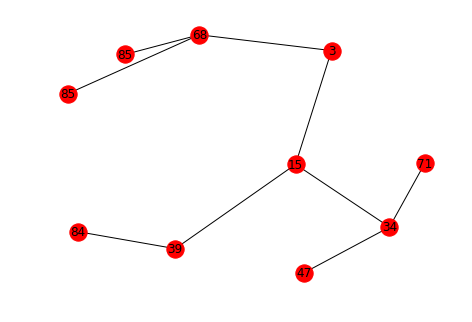

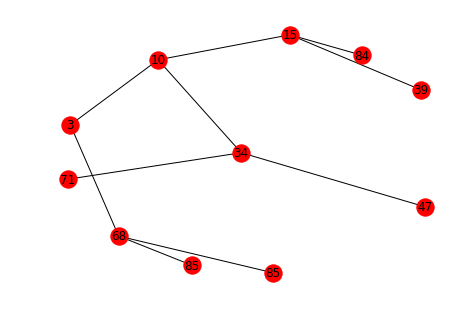

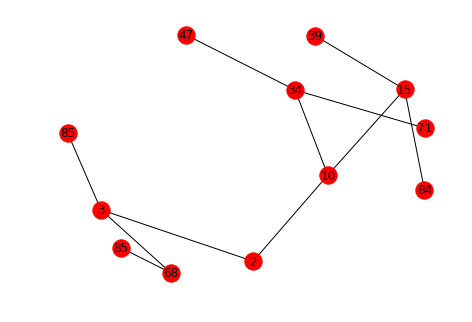

__> [3, 15, 68, 34, 39, 85, 85, 71, 47, 84]


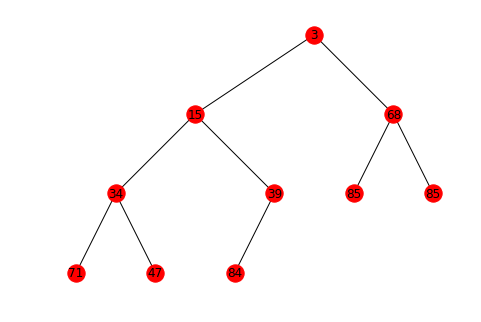

__> [3, 10, 68, 34, 15, 85, 85, 71, 47, 84, 39]


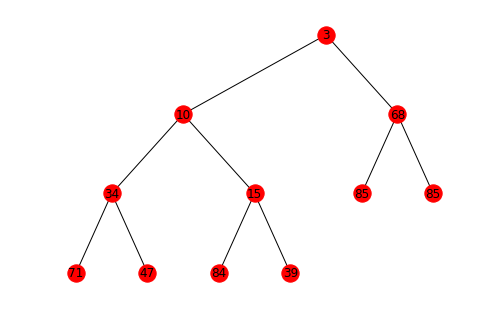

__> [2, 10, 3, 34, 15, 68, 85, 71, 47, 84, 39, 85]


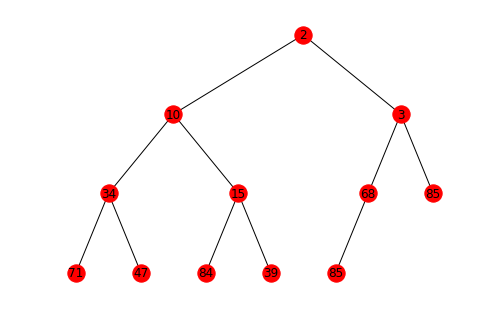

__> [1, 10, 2, 34, 15, 3, 85, 71, 47, 84, 39, 85, 68]


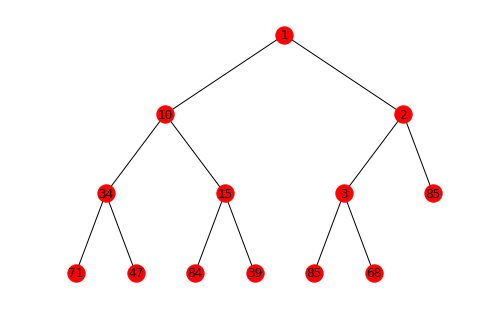

__> range(0, 50)


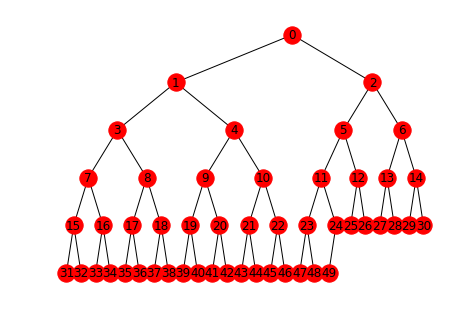

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

def dibuja_monticulo(monticulo, asignando_posiciones = True):
    g = nx.Graph()
    for i, v in enumerate(monticulo):
        g.add_node(i + 1, valor = v)
    for i in range(2, len(monticulo) + 1):
        g.add_edge(i // 2, i)
    if asignando_posiciones:
        posiciones = {n + 1 : (x, -y) for n, (x, y) in enumerate(
            posiciones_monticulo(monticulo))}
    else:
        posiciones = None
    nx.draw(g, with_labels = True, labels = nx.get_node_attributes(g, 'valor'), 
            pos = posiciones)
    
if __name__ == "__main__": 
    monticulos =  ([3, 15, 68, 34, 39, 85, 85, 71, 47, 84], 
                   [3, 10, 68, 34, 15, 85, 85, 71, 47, 84, 39], 
                   [2, 10, 3, 34, 15, 68, 85, 71, 47, 84, 39, 85],
                   [1, 10, 2, 34, 15, 3, 85, 71, 47, 84, 39, 85, 68],
                   range(50)
                  )

    for monticulo in monticulos:
        dibuja_monticulo(monticulo, False)
        plt.show()
        
    for monticulo in monticulos:
        print ("__>",monticulo)
        dibuja_monticulo(monticulo)
        plt.show()